170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


/tmp/ipython-input-2-1269252172.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])  # Affiche le nom de la classe en bas de l’image


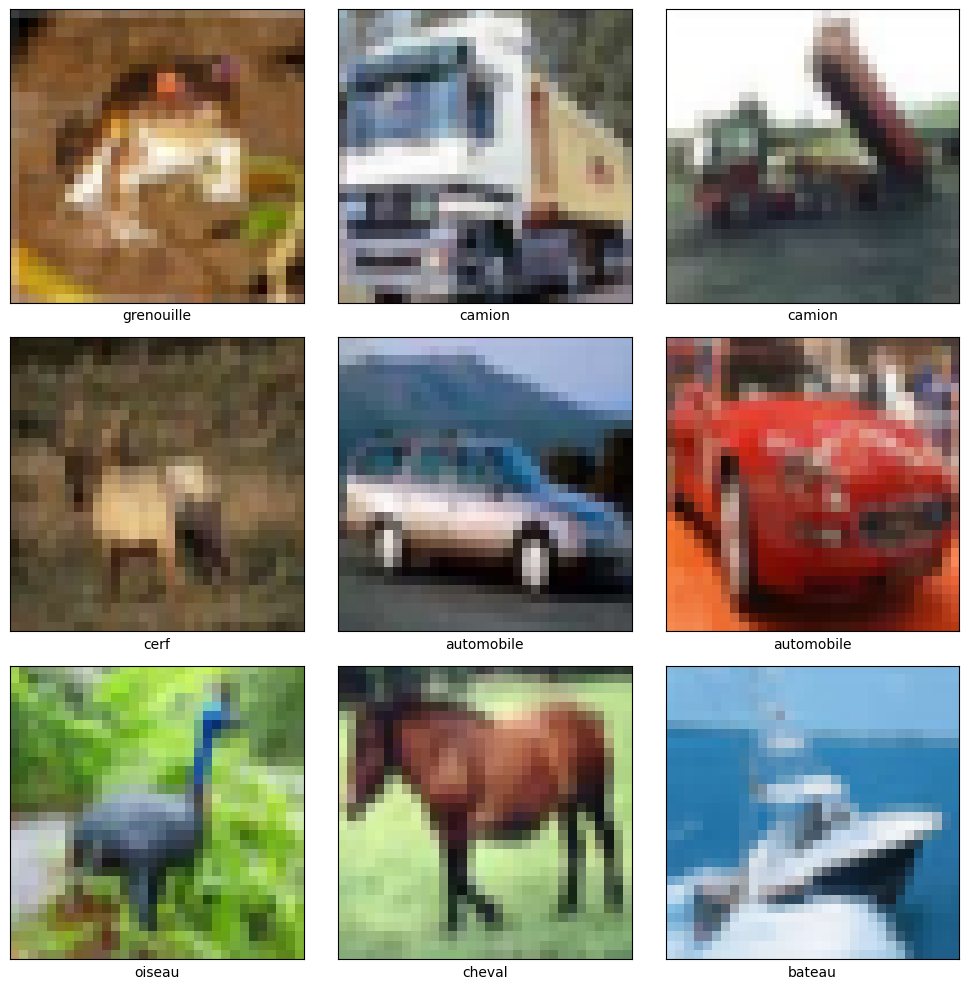

In [2]:
# 1.3.1 : Chargement et Exploration des Données

# Import des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Charger le jeu de données CIFAR-10
# x = images, y = labels (les classes de l'image)
# x_train : images pour l'entraînement
# y_train : labels pour l'entraînement
# x_test : images pour tester le modèle
# y_test : labels pour le test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Affichage des dimensions des tableaux
# Cela permet de voir combien d'images on a, et leur taille (32x32 pixels en couleur)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

# Définition des noms des classes (pour mieux afficher les images)
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# Afficher 9 images du dataset pour visualiser à quoi elles ressemblent
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)  # Création d'une grille 3x3
    plt.xticks([])  # On enlève les graduations sur l'axe x
    plt.yticks([])  # On enlève les graduations sur l'axe y
    plt.imshow(x_train[i])  # Affiche l'image
    plt.xlabel(class_names[int(y_train[i])])  # Affiche le nom de la classe en bas de l’image
plt.tight_layout()
plt.show()  # Affiche toutes les images


In [3]:
# 1.3.2 : Prétraitement des Données

# Normalisation des pixels
# Les pixels d’une image vont de 0 à 255 (valeurs entières)
# On divise chaque pixel par 255 pour que les valeurs soient entre 0 et 1
# → Cela aide le modèle à apprendre plus rapidement et plus efficacement
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
# 1.3.3 : Construction de l'Architecture CNN

model = models.Sequential([
    # Couche 1
    # Conv2D = Analyser l'image  , 32 = Nombre de filtre (3, 3) = taille du filtre par pixels , 'relu' = Comprendre des formes complexes  , (32, 32, 3) = taille de l'iamge 32 x 32 pixels et 3 couleurs (RGB rouge vert bleu)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPooling2D = rend l'image plus petit donc on divise par 2 donc l'image ce transforme en 16 X 16 px
    layers.MaxPooling2D((2, 2)),

    # Couche 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D = rend l'image plus petit donc on divise par 2 donc l'image ce transforme en 8 X 8 px
    layers.MaxPooling2D((2, 2)),

    # Couche 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classifieur
    # Flatten = Aplatir l’image en un vecteur 1D pour pouvoir la passer à une couche Dense (réseau de neurones classique)
    layers.Flatten(),

    # Dense = Couche de neurones entièrement connectée
    # 64 = nombre de neurones qui vont apprendre des combinaisons plus abstraites
    # 'relu' = active seulement les neurones utiles pour garder la non-linéarité
    layers.Dense(64, activation='relu'),

    # Dernière couche Dense = prédiction finale
    # 10 = car il y a 10 classes (avion, voiture, oiseau, etc.)
    # 'softmax' = transforme les scores en probabilités (pour chaque classe)
    layers.Dense(10, activation='softmax')
])

# Affichage du résumé du modèle (nombre de paramètres et forme des couches)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 1.3.4 : Callbacks, Compilation et Entraînement

# Callbacks = outils qui surveillent l'entraînement du modèle

# ModelCheckpoint = enregistre automatiquement le "meilleur modèle" dans un fichier
# ici, "best_cnn_model.keras" sera sauvegardé seulement si la performance s'améliore
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_cnn_model.keras", save_best_only=True)

# EarlyStopping = arrête l'entraînement si le modèle ne s'améliore plus pendant 3 époques
# restore_best_weights = reprend les meilleurs poids trouvés avant l'arrêt
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Compilation du modèle
# optimizer='adam' = méthode pour améliorer les poids automatiquement
# loss='sparse_categorical_crossentropy' = utilisée pour des labels sous forme d'entiers
# metrics=['accuracy'] = on suit la précision pendant l'entraînement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
# epochs=15 = nombre de fois où on va parcourir toutes les images d'entraînement
# validation_data = permet de voir si le modèle est bon aussi sur des images "jamais vues"
# callbacks = active les outils de surveillance (checkpoint, early stopping)
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb, earlystop_cb])


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.3568 - loss: 1.7339 - val_accuracy: 0.5472 - val_loss: 1.2614
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5729 - loss: 1.1909 - val_accuracy: 0.6318 - val_loss: 1.0472
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6428 - loss: 1.0154 - val_accuracy: 0.6629 - val_loss: 0.9758
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6792 - loss: 0.9181 - val_accuracy: 0.6805 - val_loss: 0.9234
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7100 - loss: 0.8269 - val_accuracy: 0.6857 - val_loss: 0.9083
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 48ms/step - accuracy: 0.7306 - loss: 0.7698 - val_accuracy: 0.6974 - val_loss: 0.8646
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7556 - loss: 0.7064 - val_accuracy: 0.7010 - val_loss: 0.8825
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7651 -

313/313 - 4s - 13ms/step - accuracy: 0.7148 - loss: 0.8586

Test accuracy: 0.7148


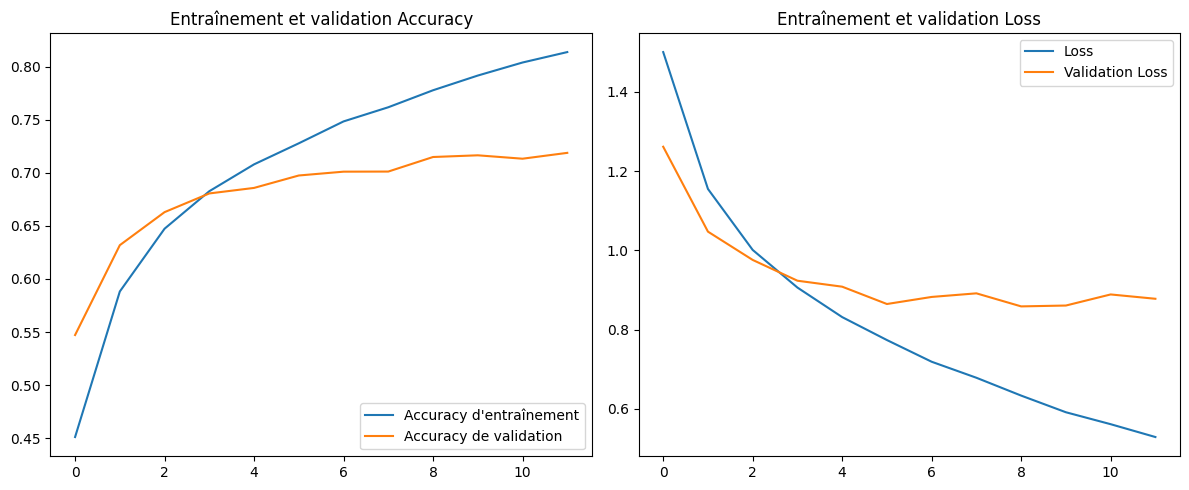

In [10]:
# E1.3.5 : Évaluation et Analyse / Courbes

# Évaluer le modèle sur les données de test (jamais vues par le modèle)
# test_loss = la perte (à quel point le modèle se trompe)
# test_acc = la précision (taux de bonnes réponses)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')  # Affichage avec 4 chiffres après la virgule

# Affichage des courbes d'apprentissage pour mieux comprendre le comportement du modèle
plt.figure(figsize=(12, 5))  # Largeur x hauteur de l'image

# Graphique de précision
# On compare la précision pendant l'entraînement et pendant la validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')  # Précision sur l'entraînement
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')  # Sur les données test
plt.legend(loc='lower right')  # Position de la légende
plt.title('Entraînement et validation Accuracy')  # Titre du graphique

# Graphique de perte (loss)
# Permet de voir si le modèle apprend ou s’il stagne
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')  # Perte sur les données d’entraînement
plt.plot(history.history['val_loss'], label='Validation Loss')  # Perte sur les données de test
plt.legend(loc='upper right')
plt.title('Entraînement et validation Loss')

plt.tight_layout()  # Pour ne pas que les graphes se chevauchent
plt.show()  # Affiche le tout

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


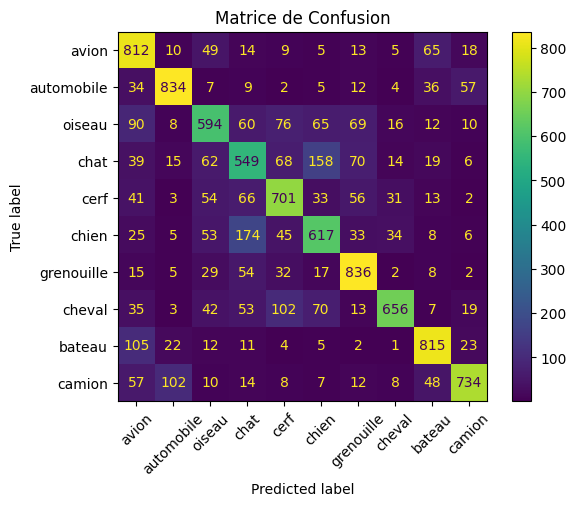

In [8]:
# Etape 6 : Matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur les images de test
# model.predict() donne un tableau avec les probabilités pour chaque classe
# np.argmax() récupère la classe avec la plus grande probabilité (prédiction finale)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Création de la matrice de confusion
# Compare les vraies classes (y_test) avec les classes prédites (y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

# Affichage de la matrice sous forme graphique
# display_labels = noms des classes à afficher (ex: avion, chien, etc.)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Affichage avec rotation des étiquettes
disp.plot(xticks_rotation=45)
plt.title("Matrice de Confusion")
plt.show()  # Affiche le graphique
